# Waveform analysis

In [2]:
%matplotlib inline

import os
import textwrap
import math
#import h5py

import matplotlib        as mpl
import matplotlib.pyplot as plt
import numpy             as np
import tables            as tb

import invisible_cities.core.core_functions as coref
import invisible_cities.core.fit_functions  as fitf
import invisible_cities.reco.dst_functions  as dstf
import invisible_cities.reco.tbl_functions  as tbl
import invisible_cities.sierpe.blr          as blr

from   invisible_cities.icaro. hst_functions   import display_matrix
from   invisible_cities.database               import load_db

from   matplotlib                              import gridspec
from   matplotlib.patches                      import Ellipse
from   scipy.optimize                          import curve_fit
from   scipy.interpolate                       import interp1d

from   matplotlib.colors                       import SymLogNorm

#from   fitpol import fitpol

# Formatting options
mpl.rcParams.update({'font.size': 14})
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['patch.force_edgecolor'] = False
mpl.rcParams['patch.facecolor'] = 'gray'
hargs = {'histtype': 'stepfilled', 'edgecolor': 'black', 'facecolor': 'gray'}

# Directory to which figures will be stored
save_dir = "/Users/jrenner/local/data/NEW/6485/waveforms"

## Specify configuration parameters and read the waveforms

In [6]:
rnum = 6485
DataPMT = load_db.DataPMT("new",rnum)

coeff_c = DataPMT.coeff_c.values
coeff_blr = DataPMT.coeff_blr.values
pmt_active = np.nonzero(DataPMT.Active.values.astype(bool))[0].tolist()
n_baseline = 48000
thr_trigger = 5
accum_discharge_length = 5000

In [7]:
wffile = '/Users/jrenner/local/data/NEW/6485/selection_6485_Tlphotopeak.h5'
event_numbers, timestamps = tbl.get_event_numbers_and_timestamps_from_file_name(wffile)
h5in = tb.open_file(wffile, "r")
NEVT_pmt, pmtrwf, sipmrwf, pmtblr = tbl.get_rwf_vectors(h5in)

## Plots

KeyboardInterrupt: 

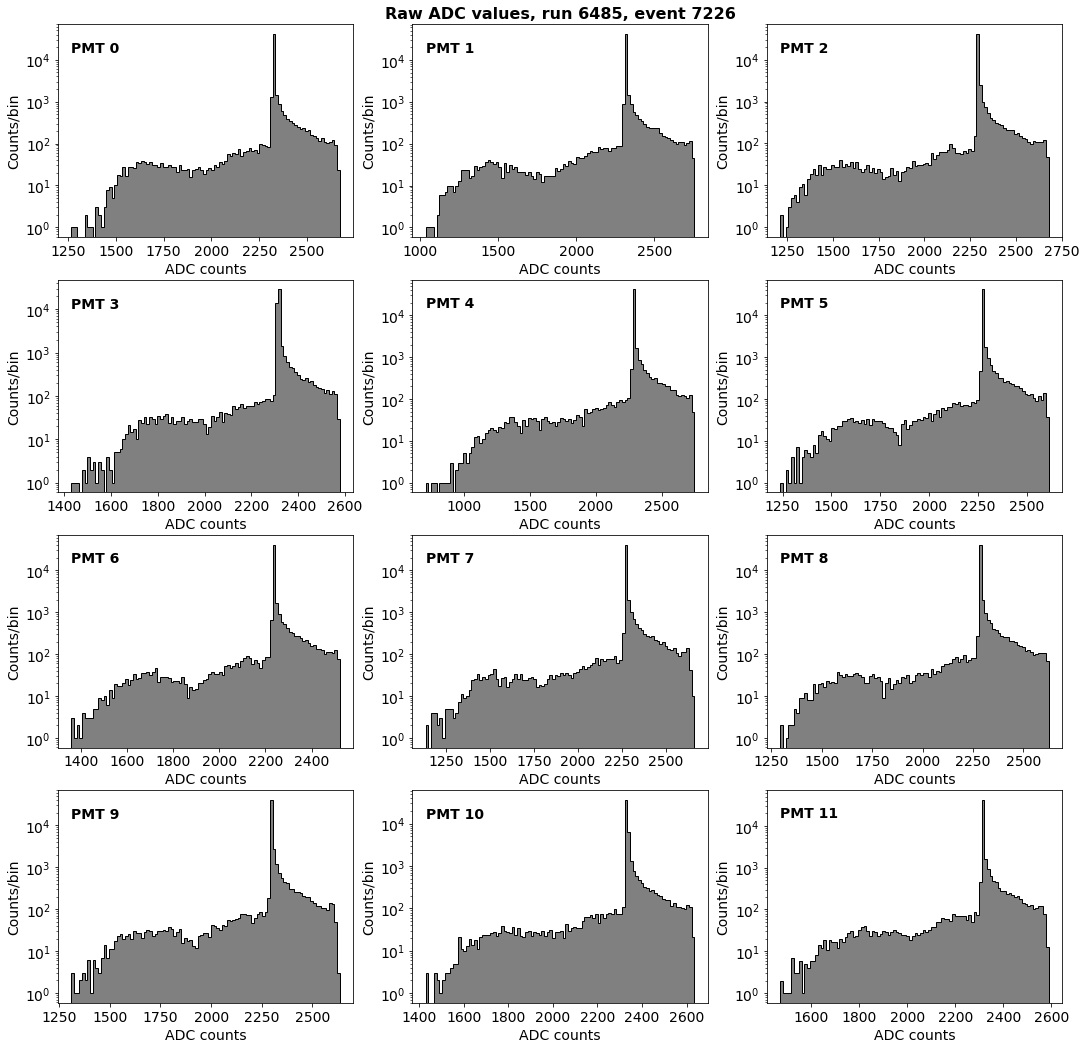

In [8]:
# plot the distribution of raw samples for all waveforms
for ii,ee in enumerate(event_numbers):
    
    fig = plt.figure(3)
    fig.set_figheight(18.0)
    fig.set_figwidth(18.0)

    RWF = pmtrwf[ii]
    
    # Plot the distribution of raw ADC values for each PMT.
    for ipmt in pmt_active:
        wf = RWF[ipmt]
        ax = fig.add_subplot(4,3,ipmt+1)
        hh = plt.hist(wf,bins=100,**hargs)
        if(ipmt == 1):
            plt.title("Raw ADC values, run {}, event {}".format(rnum,ee),fontsize=16,fontweight="bold")
        plt.text(np.min(hh[1]), 3*np.max(hh[0])/8, "PMT {}".format(ipmt),fontsize=14,fontweight="bold")
        plt.yscale('log')
        plt.xlabel('ADC counts')
        plt.ylabel('Counts/bin')
    
    # Save the figure.
    plt.savefig("{}/RAW_ADC_run{}_evt{}.pdf".format(save_dir,rnum,ee), bbox_inches='tight')
    plt.close()

In [ ]:
# plot the corrected and uncorrected waveforms for all events
for ii,ee in enumerate(event_numbers):
    
    fig = plt.figure()
    fig.set_figheight(5.0)
    fig.set_figwidth(15.0)

    RWF = pmtrwf[ii]
    RWF = pmtrwf[ii]
    CWF = blr.deconv_pmt(RWF,coeff_c,coeff_blr,pmt_active,n_baseline,thr_trigger,accum_discharge_length)

    sum_RWF = np.sum(RWF,axis=0)
    sum_CWF = np.sum(CWF,axis=0)
    
    # plot the corrected and uncorrected waveforms
    ax1 = fig.add_subplot(211)
    ax1.plot(sum_RWF,color='black')
    ax1.set_xlim(10000,40000)
    #ax1.set_xlabel('Sample')
    ax1.set_ylabel('ADC counts')
    #ax1.text(10700, 4.0*max(sum_RWF)/8, 'Uncorrected waveform',fontsize=14) #bbox={'facecolor':'white', 'alpha':1.0, 'pad':5}
    ax1.set_title("run {}, event {}".format(rnum,ee),fontsize=16,fontweight="bold")
    ax1.fill_between(xfit, pfit_minus(xfit), pfit_plus(xfit), facecolor='lightgray')
    
    ax2 = fig.add_subplot(212)
    ax2.plot(sum_CWF,color='black')
    ax2.set_xlim(10000,40000)
    ax2.set_xlabel('Sample')
    ax2.set_ylabel('ADC counts')
    #ax2.text(10700, 3.5*max(sum_RWF)/8, 'Corrected waveform',fontsize=14) #bbox={'facecolor':'white', 'alpha':1.0, 'pad':5}
    
    # Save the figure.
    plt.savefig("{}/WF_run{}_evt{}.pdf".format(save_dir,rnum,ee), bbox_inches='tight')
    plt.close()

### Misc code

In [13]:
print(len(event_numbers))
print(event_numbers)

179
[   4034    5611    7226   11057   13212   22559   27167   34398   49038
   54466   66481  103367  119774  125946  158271  177165  187410  224817
  233631  271308  313318  315512  321352  324617  332885  341498  355346
  358505  379150  382055  391719  413625  415762  457104  479997  484435
  524435  526632  528035  577315  579955  585285  586217  601444  676932
  683258  695960  704388  725050  744325  753948  758535  783632  809717
  830181  849186  863221  891586  902872  906344  910516  935146  952414
  977174  997571  998139 1005565 1064916 1094261 1106983 1107365 1129735
 1139511 1152002 1152237 1159854 1167460 1170098 1188374 1192712 1199959
 1206122 1207328 1249932 1282845 1291718 1326369 1336044 1342145 1344094
 1344493 1348134 1400743 1444786 1470504 1491344 1509331 1535475 1550917
 1555299 1559992 1588034 1599644 1624408 1625560 1627290 1629224 1651827
 1662150 1679524 1711896 1716886 1733752 1775899 1779025 1801808 1807949
 1808613 1850428 1871195 1950250 1952240 195371

Selected event number 7226 at index 2


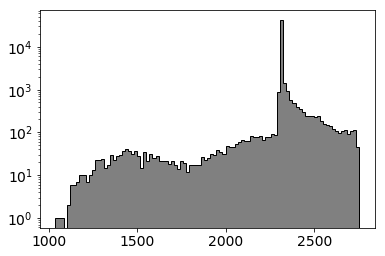

In [21]:
# select the waveform and deconvolve
evt_wf = 7226
iwf = -1
for ii,ee in enumerate(event_numbers):
    #print(ee)
    if(ee == evt_wf):
        if(iwf > 0): print("WARNING: selected event twice!")
        iwf = ii

RWF = pmtrwf[iwf]
CWF = blr.deconv_pmt(RWF,coeff_c,coeff_blr,pmt_active,n_baseline,thr_trigger,accum_discharge_length)

wf1 = RWF[1]
plt.hist(wf1,bins=100,**hargs)
plt.yscale('log')

sum_RWF = np.sum(RWF,axis=0)
sum_CWF = np.sum(CWF,axis=0)

print("Selected event number {} at index {}".format(evt_wf,iwf))

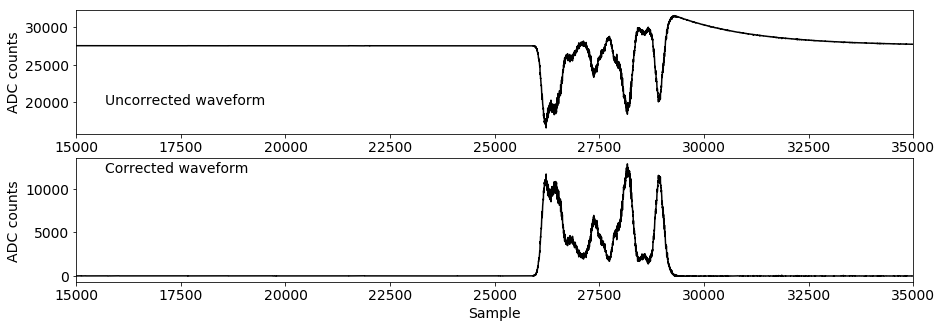

In [22]:
# plot the corrected and uncorrected waveforms
fig = plt.figure(3)
fig.set_figheight(5.0)
fig.set_figwidth(15.0)

ax1 = fig.add_subplot(211)
ax1.plot(sum_RWF,color='black')
ax1.set_xlim(15000,35000)
#ax1.set_xlabel('Sample')
ax1.set_ylabel('ADC counts')
ax1.text(15700, 5.0*max(sum_RWF)/8, 'Uncorrected waveform',fontsize=14) #bbox={'facecolor':'white', 'alpha':1.0, 'pad':5}

ax2 = fig.add_subplot(212)
ax2.plot(sum_CWF,color='black')
ax2.set_xlim(15000,35000)
ax2.set_xlabel('Sample')
ax2.set_ylabel('ADC counts')
ax2.text(15700, 3*max(sum_RWF)/8, 'Corrected waveform',fontsize=14) #bbox={'facecolor':'white', 'alpha':1.0, 'pad':5}

plt.savefig("{}/CSTH_WF_run4735_evt{}.pdf".format(save_dir,evt_wf), bbox_inches='tight')

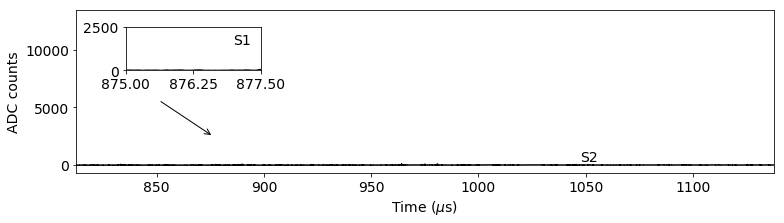

In [23]:
# plot the corrected waveform
fig = plt.figure()
fig.set_figheight(3.0)
fig.set_figwidth(12.5)

WFSCALE = 25./1000
wf_time = np.arange(0,len(sum_CWF),1.)*WFSCALE

ax1 = fig.add_subplot(111)
ax1.plot(wf_time,sum_CWF,'-',color='black')
ax1.set_xlim(32500*WFSCALE,45500*WFSCALE)
plt.annotate('', xy=(35050*WFSCALE,2500),  xycoords='data',
                xytext=(34050*WFSCALE,5600), textcoords='data',
                arrowprops=dict(arrowstyle="->",facecolor='black'))
#                arrowprops=dict(arrowstyle="-[,widthB=1"))
#ax1.locator_params(axis='y', nbins=5)
#ax1.axis([0,130,654,670])
ax1.set_xlabel('Time ($\mu$s)')
ax1.set_ylabel('ADC counts')

#ax2 = ax1.twinx()
#ax2.set_ylim(ax1.get_ylim())
#y2ticks = np.array([4000, 2000, 0]) #, 350, 400])
#ax2.set_yticks(y2ticks)
#ax2.set_yticklabels(y2ticks) #,fontsize=tc_tlabel_size,fontname=tc_tlabel_font,fontweight=tc_tlabel_weight)
#ax2.set_ylabel('ADC counts')

# S1 inset
ax1i = fig.add_axes([0.18,0.60,0.15,0.2])
ax1i.plot(wf_time,sum_CWF,'-',color='black')
ax1i.axis([35000*WFSCALE,35100*WFSCALE,0,2500])
ax1i.xaxis.set_ticks([35000*WFSCALE,35050*WFSCALE,35100*WFSCALE])
ax1i.yaxis.set_ticks([0,2500])
#ax2i = ax1i.twinx()
#ax2i.set_ylim(ax1i.get_ylim())
#y2iticks = np.array([160, 80, 0]) #, 350, 400])
#ax2i.set_yticks(y2iticks)
#ax2i.set_yticklabels(y2iticks) #,fontsize=tc_tlabel_size,fontname=tc_tlabel_font,fontweight=tc_tlabel_weight)
        
# S1 and S2 labels
fig.text(0.30,0.72,"S1",color='black')
fig.text(0.685,0.18,"S2",color='black')
#fig.text(0.26,0.25,"NaI",color='black')
#formatPlot(plt)
lb_x = ax1i.xaxis.get_majorticklabels()
lb_y = ax1i.yaxis.get_majorticklabels()
#for lb in (lb_x + lb_y):
#    lb.set_fontname(tc_tlabel_font)
#    lb.set_fontweight(tc_tlabel_weight)
#    lb.set_fontsize(tc_tlabel_size*0.85)

plt.savefig("{}/CSTH_WF_run6485_evt{}.pdf".format(save_dir,evt_wf), bbox_inches='tight')

-------